In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('concrete_data.csv')

In [4]:
df.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
488,387.0,20.0,94.0,157.0,14.3,938.0,845.0,3,22.75


In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
X=df.drop(columns=['Strength'])
y=df['Strength']

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# --- Model Training and Evaluation without Power Transformation 

In [13]:
lr= LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
print(f"R² score with standard scaling: {r2_score(y_test, y_pred)}")

R² score with standard scaling: 0.627553179231485


In [14]:
# Cross-validation to get a more robust performance estimate

In [15]:
lr= LinearRegression()
cv_score=np.mean(cross_val_score(lr,X,y,scoring='r2'))
print(f"Cross-validated R² score without transformation: {cv_score}")

Cross-validated R² score without transformation: 0.46099404916628683


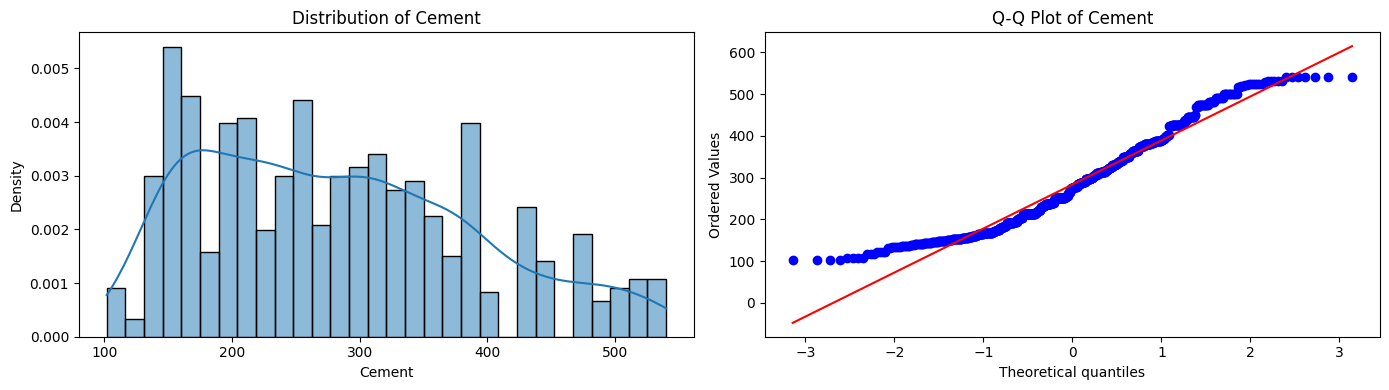

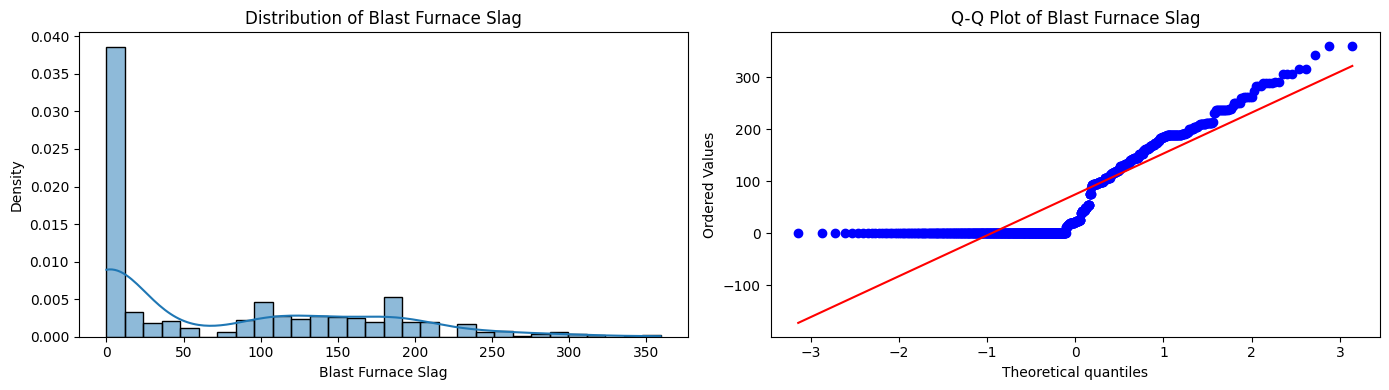

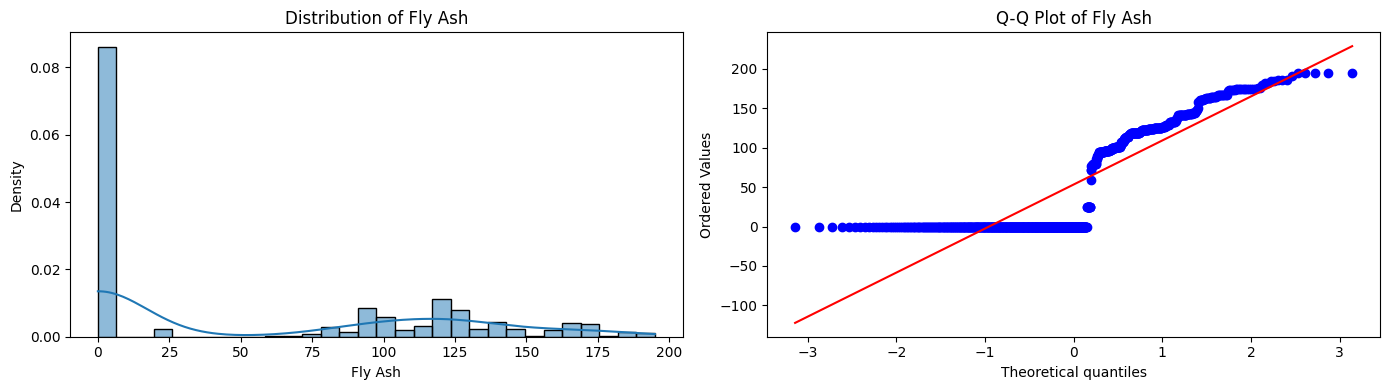

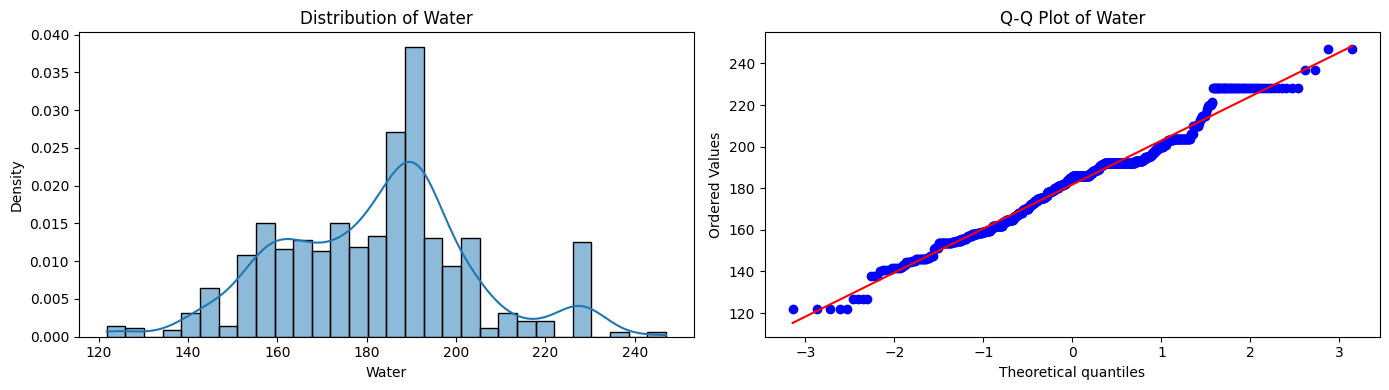

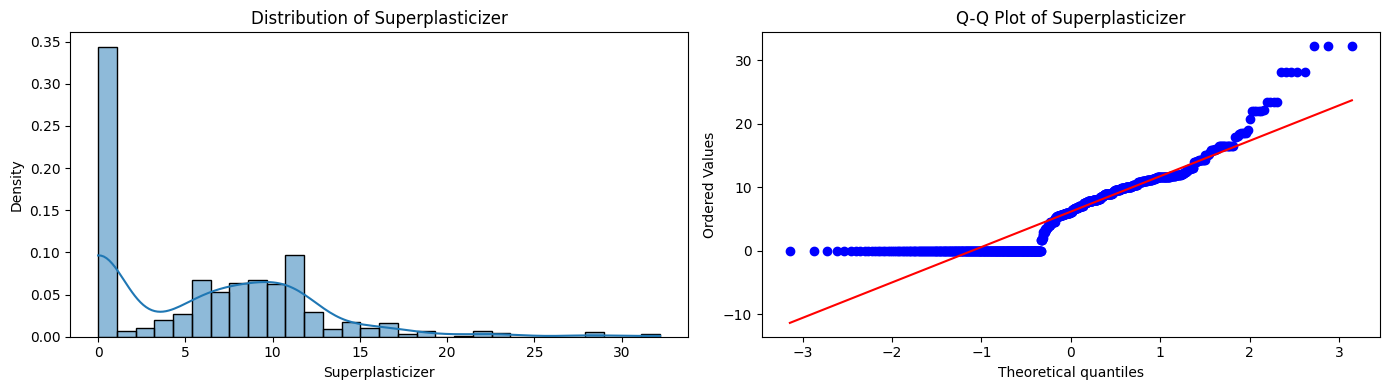

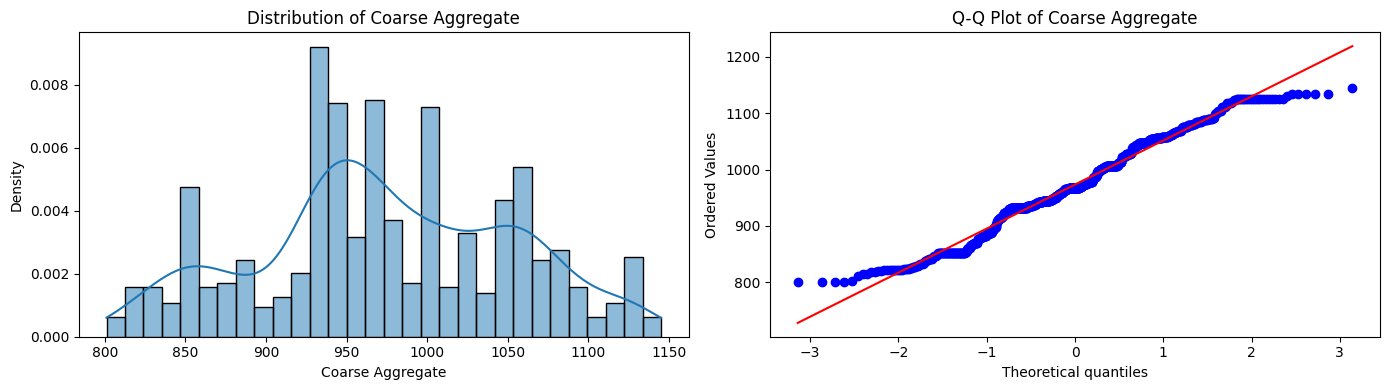

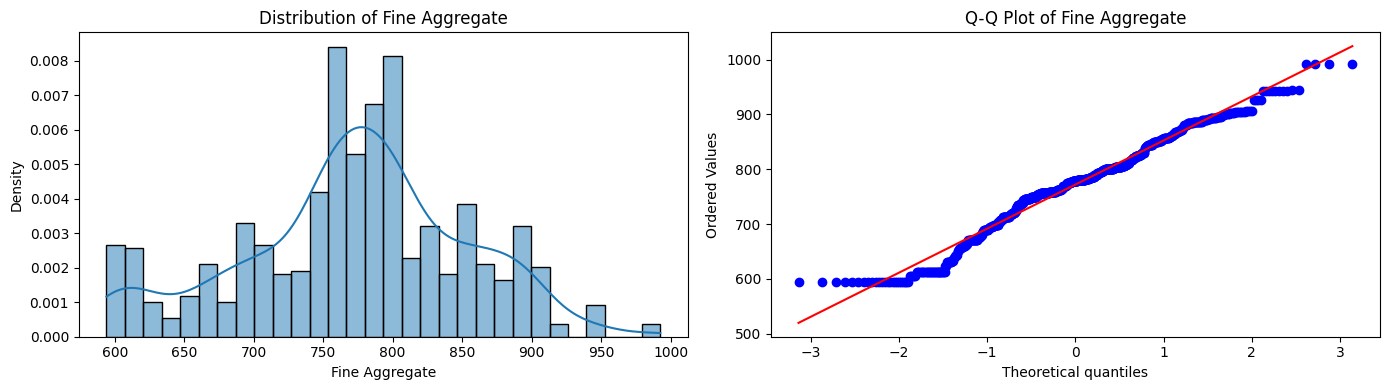

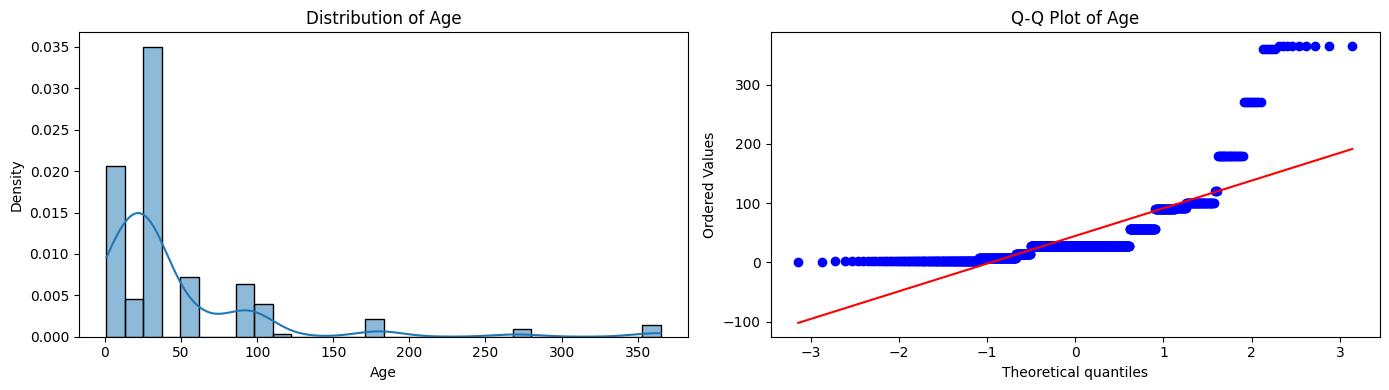

In [16]:
# Plot histograms and Q-Q plots for each feature to check normality
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Left: Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], bins=30, kde=True, stat="density")
    plt.title(f'Distribution of {col}')

    # Right: Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()  
    plt.show()

In [17]:
# Add a small positive constant to handle zero values
# Box-Cox requires strictly positive values

#### Applying Power Transformation  to Make data more Gaussian-like (normal distribution).

In [18]:
#Box-Cox (and other power transformations) works to make the distribution
#of the feature values more normal, particularly when dealing with skewed distributions.
#It modifies the shape of the data to improve model performance.
#This transformation should be applied before scaling because scaling
#is a linear operation that won't address skewness or non-normality.

#Scaling does not affect the distribution of the data (it doesn't make data more normal).
#we use X_train instead of X_train_scaled here.

In [19]:
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+0.000001)
X_test_transformed=pt.transform(X_test+0.000001)

In [20]:
X_train_transformed

array([[-1.27975148,  0.9561511 ,  1.12804495, ..., -0.26250008,
        -0.67756847,  0.1060097 ],
       [ 1.24470596,  0.70199413,  1.13757676, ..., -1.91272791,
        -0.31406219,  0.1060097 ],
       [ 0.07984236, -1.08566729,  1.13140696, ...,  1.01840672,
         0.02595744, -1.67597002],
       ...,
       [-0.84451727, -1.08566729,  1.13368097, ...,  1.34536665,
         0.29715694,  1.24673336],
       [ 1.5656235 ,  0.92549636, -0.88721185, ..., -1.5372548 ,
         0.0762111 ,  0.1060097 ],
       [ 0.42655631, -1.08566729,  1.12610617, ..., -0.62083414,
         0.0951082 ,  0.1060097 ]])

In [21]:
# Display the lambda values from Box-Cox transformation
lambdas_df = pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

In [22]:
# --- Train and evaluate model with Box-Cox transformed data ---

lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred2=lr.predict(X_test_transformed)
print(f"R² score with Box-Cox transformation: {r2_score(y_test, y_pred2)}")

R² score with Box-Cox transformation: 0.8047825011028632


In [23]:
# Using cross val score

In [24]:
X_transformed = pt.fit_transform(X + 0.000001)
cv_score_transformed = np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))
print(f"Cross-validated R² score with Box-Cox transformation: {cv_score_transformed}")

Cross-validated R² score with Box-Cox transformation: 0.6662950327179045


In [25]:
X_train_transformed_df = pd.DataFrame(
    X_train_transformed, 
    columns=X_train.columns
)

In [26]:
X_train_transformed_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.956151,1.128045,-0.301920,0.898506,-0.262500,-0.677568,0.106010
1,1.244706,0.701994,1.137577,-0.165055,0.749235,-1.912728,-0.314062,0.106010
2,0.079842,-1.085667,1.131407,-1.047291,0.788486,1.018407,0.025957,-1.675970
3,-0.145641,0.898125,1.096514,0.581224,0.733792,-1.750779,0.583253,0.106010
4,-1.131044,0.787203,1.133149,-1.105297,0.811152,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,0.997079,-0.887212,-1.769923,0.820684,0.390563,0.358776,-1.675970
820,-0.198733,-1.085667,1.133622,-1.839129,0.838861,1.445973,0.322797,-0.475625
821,-0.844517,-1.085667,1.133681,-0.706089,0.788486,1.345367,0.297157,1.246733
822,1.565624,0.925496,-0.887212,-0.019311,0.761011,-1.537255,0.076211,0.106010


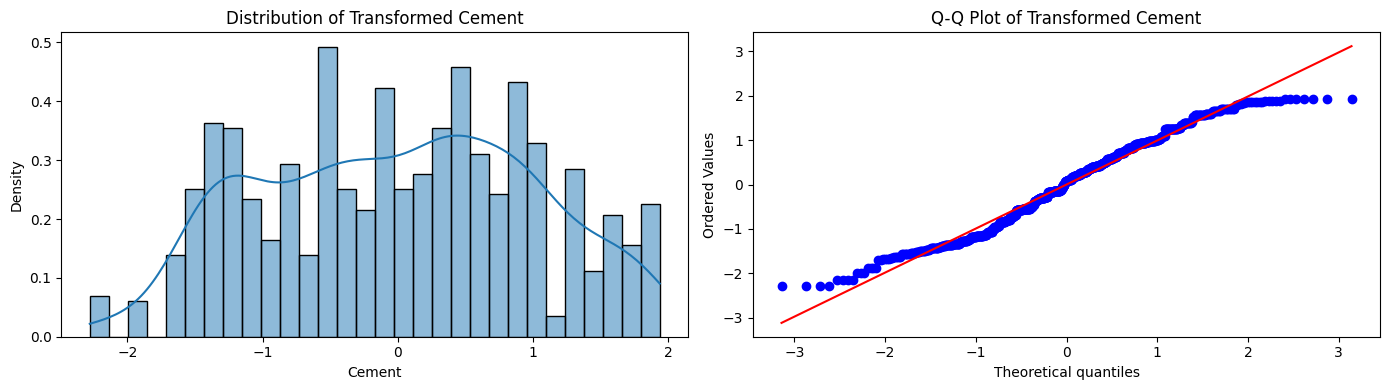

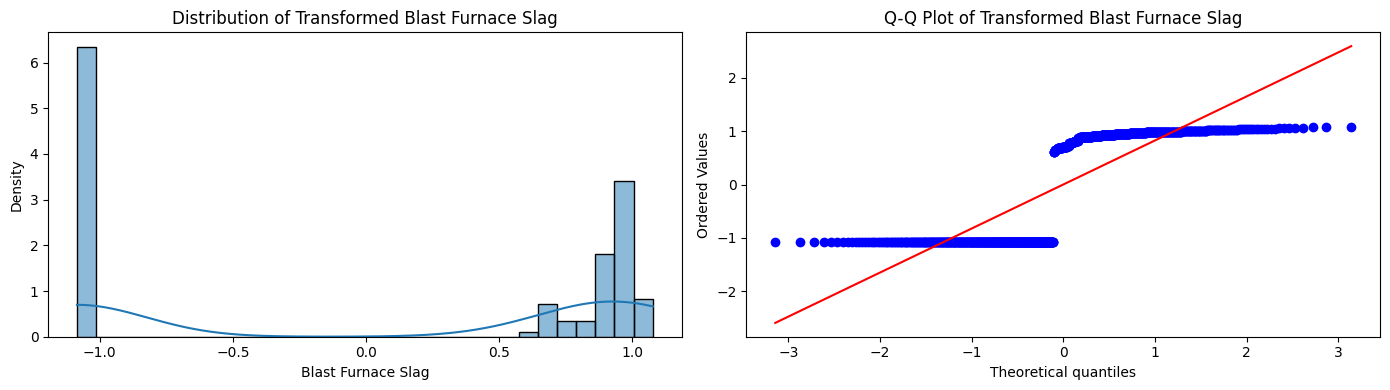

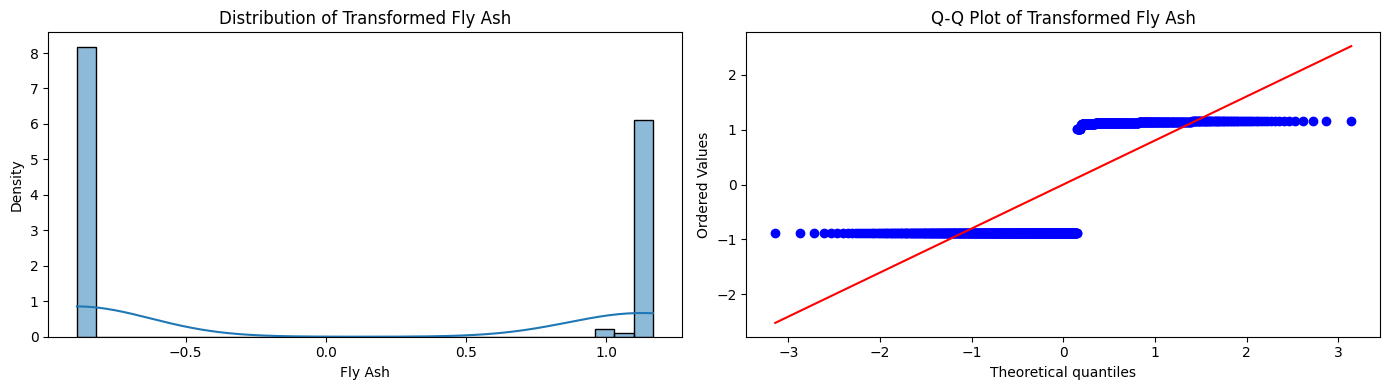

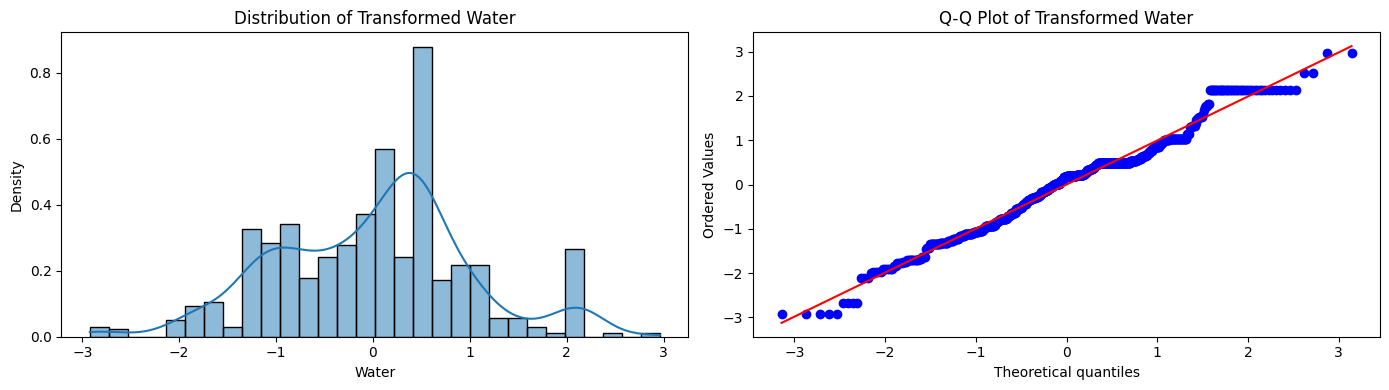

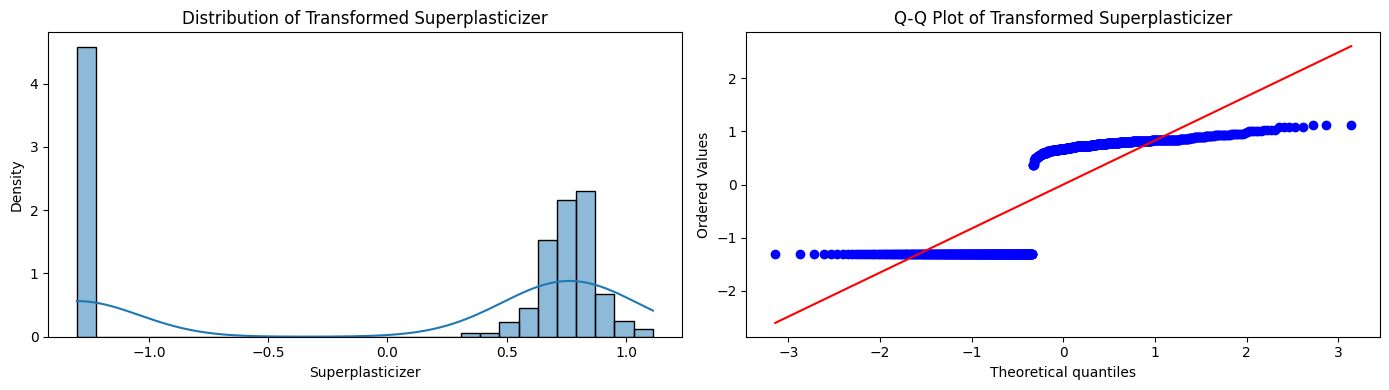

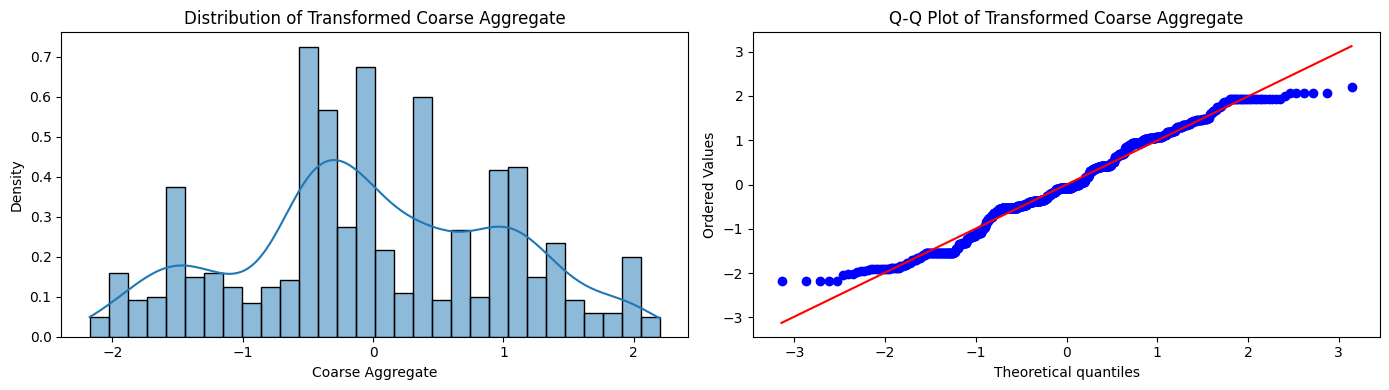

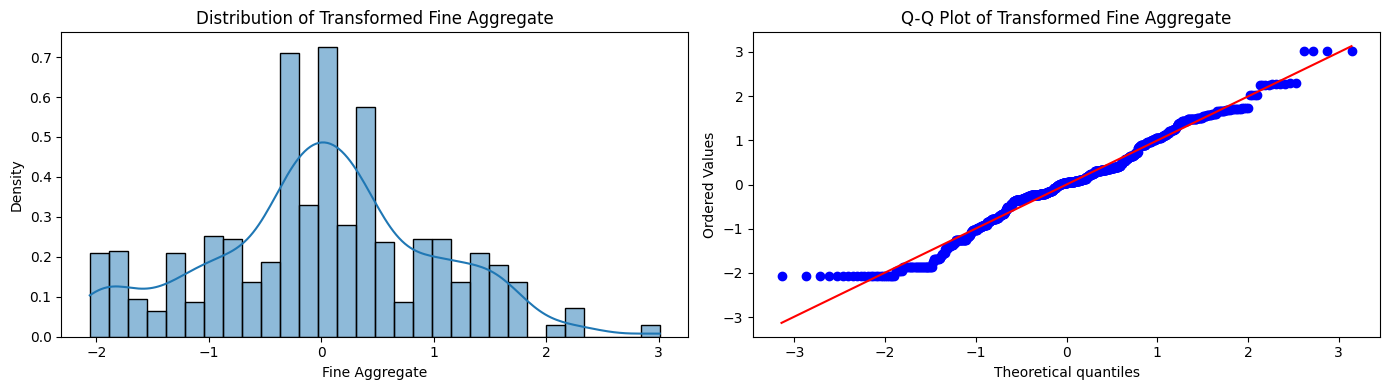

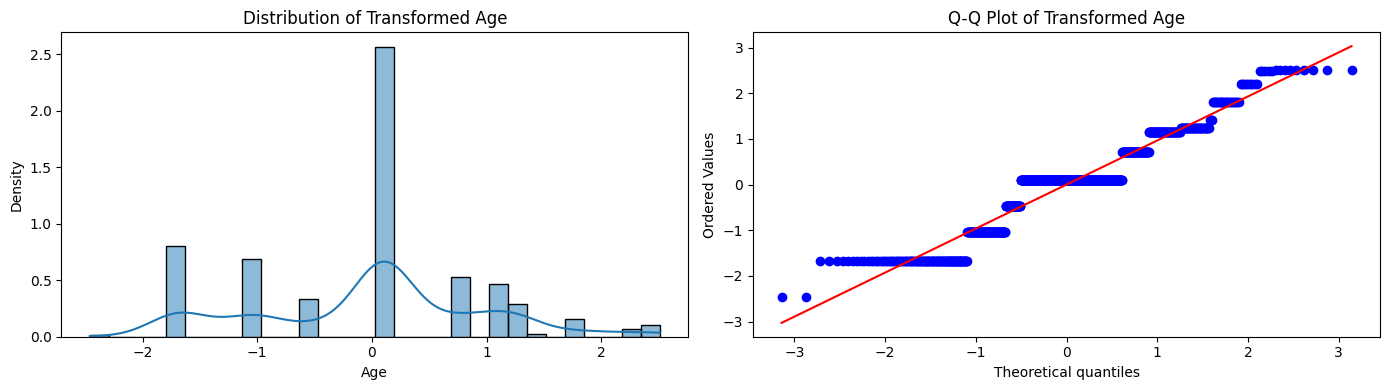

In [27]:

# Plot histograms and Q-Q plots for each transformed feature
for col in X_train_transformed_df.columns:
    plt.figure(figsize=(14, 4))

    # Left: Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_transformed_df[col], bins=30, kde=True, stat="density")
    plt.title(f'Distribution of Transformed {col}')

    # Right: Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train_transformed_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Transformed {col}')

    plt.tight_layout()  
    plt.show()

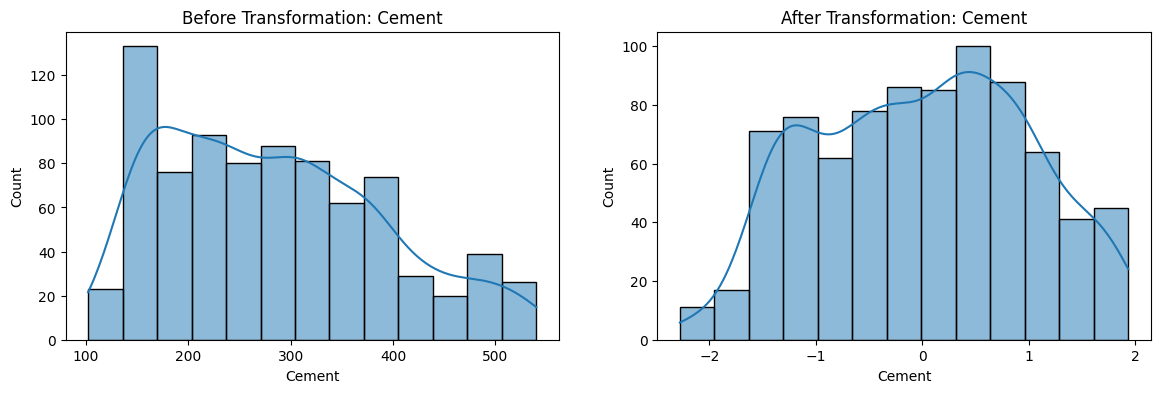

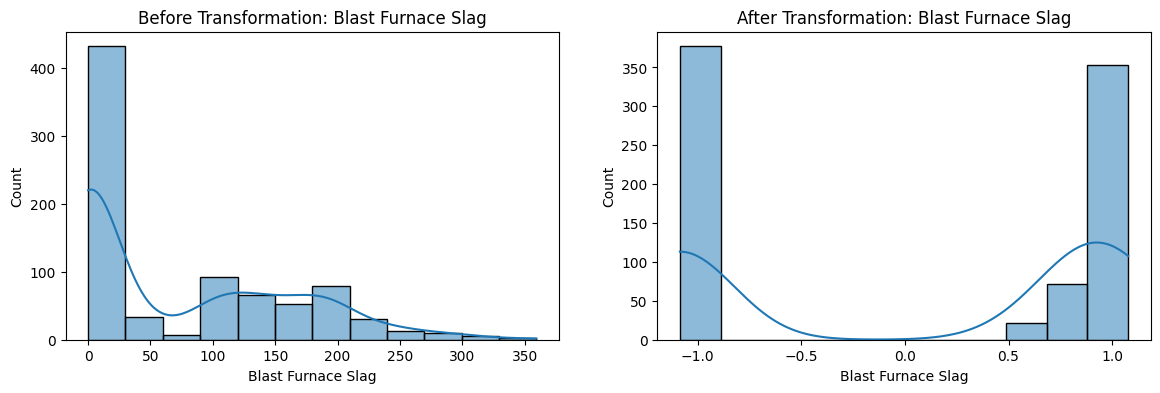

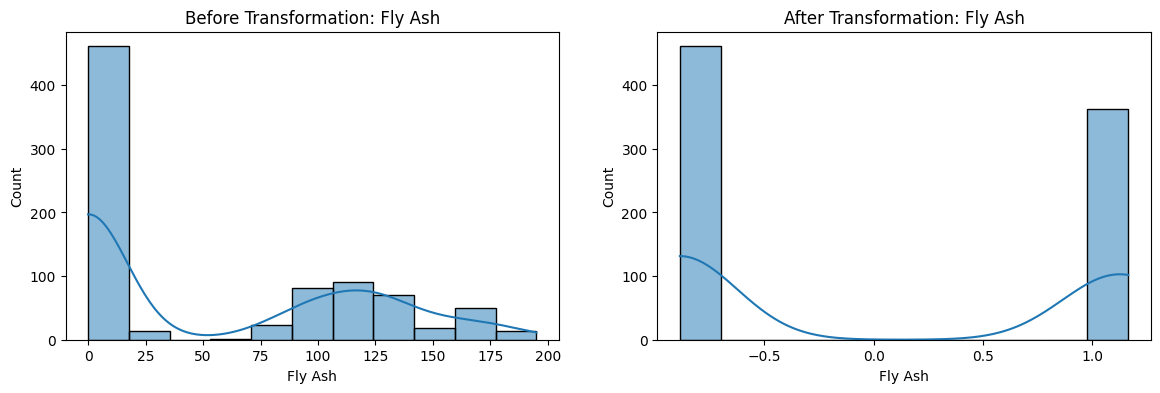

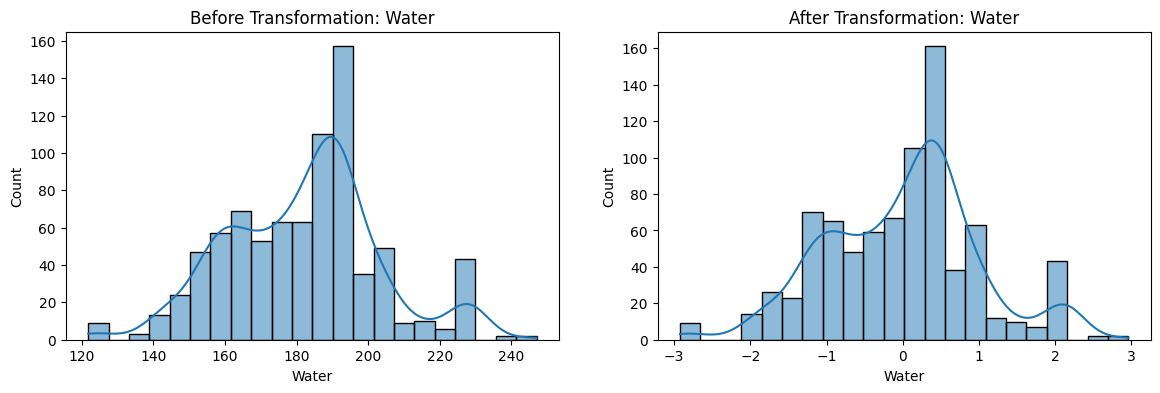

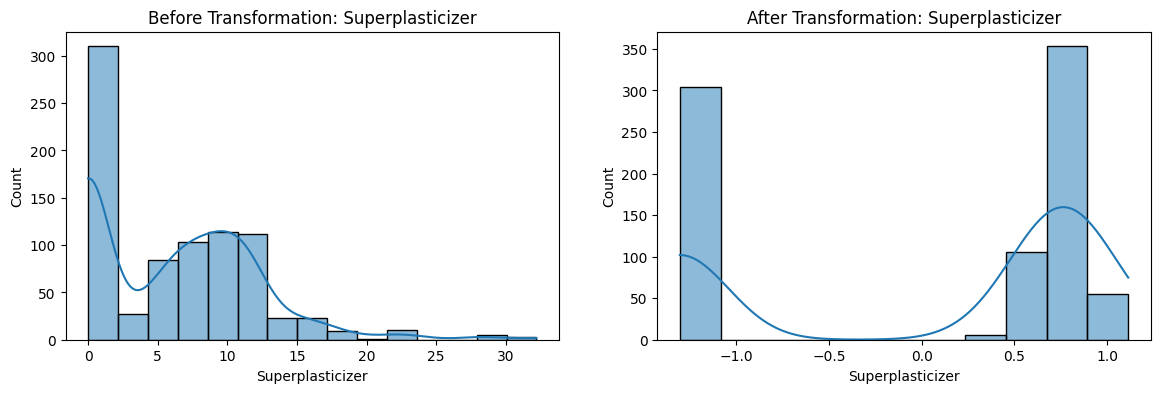

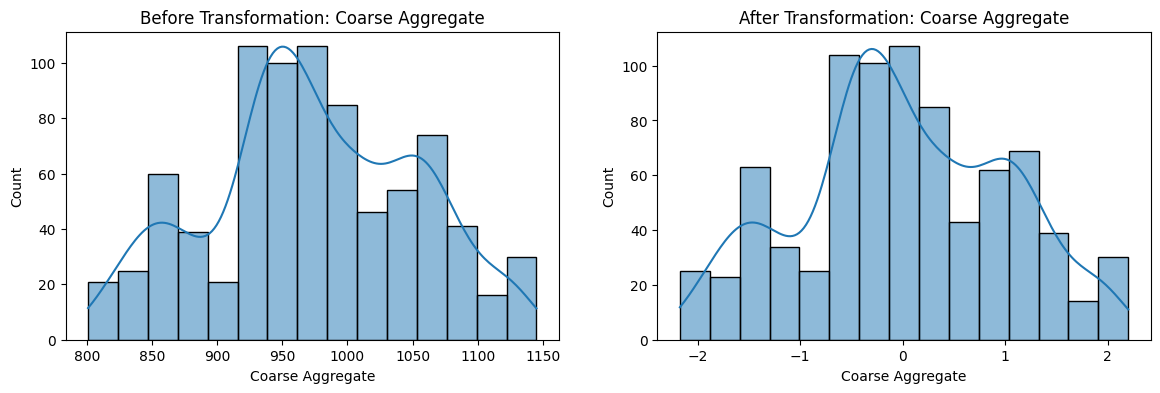

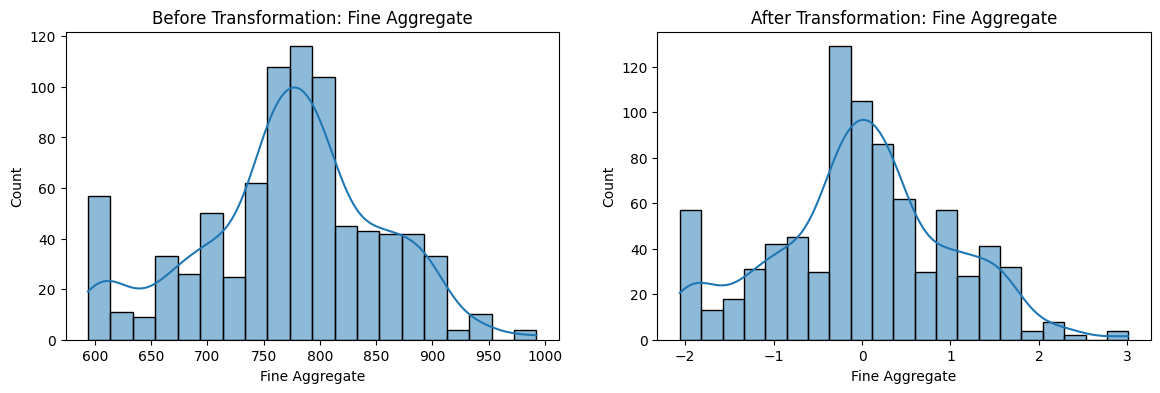

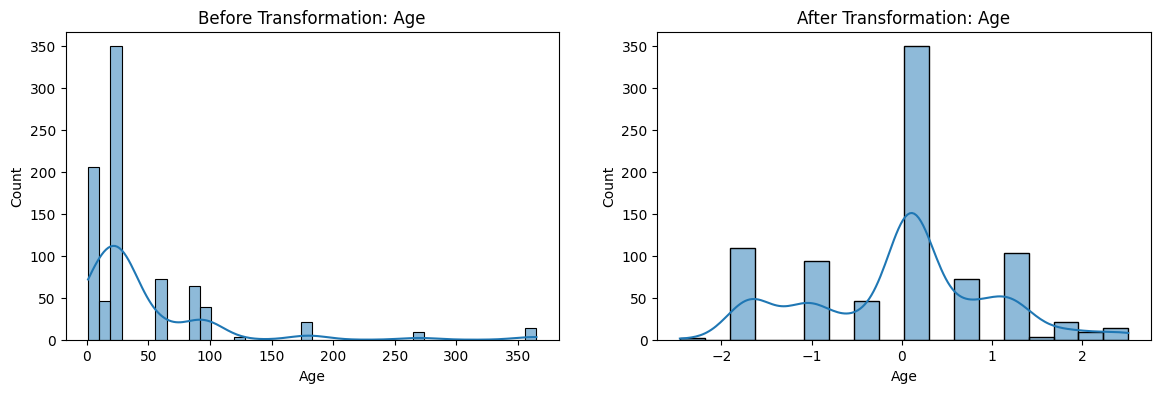

In [28]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14, 4))
    
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Before Transformation: {col}")

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f"After Transformation: {col}")

    plt.show()


In [29]:
print("Model Performance Comparison:")
print(f"R² with standard scaling: {r2_score(y_test, y_pred)}")
print(f"R² with Box-Cox transformation: {r2_score(y_test,y_pred2)}")
print(f"Improvement: {r2_score(y_test, y_pred2) - r2_score(y_test, y_pred)}")

Model Performance Comparison:
R² with standard scaling: 0.627553179231485
R² with Box-Cox transformation: 0.8047825011028632
Improvement: 0.1772293218713782


In [30]:
#### Applying yeo-jhonson Transformation

In [31]:
from sklearn.preprocessing import PowerTransformer
 # by deafult its  Yeo-Johnson
pt1 = PowerTransformer() ## no need to explicitly method='yeo-johnson' 
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)


In [32]:
lr=LinearRegression() 
lr.fit(X_train_transformed2,y_train)
y_pred3= lr.predict(X_test_transformed2)
print(f"R² score with Yeo-jhonson transformation: {r2_score(y_test, y_pred3)}")

R² score with Yeo-jhonson transformation: 0.8161906513354854


In [33]:
print("Model Performance Comparison:")
print(f"R² with standard scaling: {r2_score(y_test, y_pred)}")
print(f"R² with Box-Cox transformation: {r2_score(y_test, y_pred2)}")
print(f"R² with Yeo-Johnson transformation: {r2_score(y_test, y_pred3)}")  

print(f"Improvement using Box-Cox transformation: {r2_score(y_test, y_pred2) - r2_score(y_test, y_pred)}")
print(f"Improvement using Yeo-Johnson transformation: {r2_score(y_test, y_pred3) - r2_score(y_test, y_pred)}") 

Model Performance Comparison:
R² with standard scaling: 0.627553179231485
R² with Box-Cox transformation: 0.8047825011028632
R² with Yeo-Johnson transformation: 0.8161906513354854
Improvement using Box-Cox transformation: 0.1772293218713782
Improvement using Yeo-Johnson transformation: 0.1886374721040004
